In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
birddata = pd.read_csv("bird_tracking.csv")
bird_names = pd.unique(birddata.bird_name) 

In [3]:
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))
birddata["timestamp"] = pd.Series(timestamps, index = birddata.index)

In [4]:
data =  birddata[birddata.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time-times[0] for time in times]
elapsed_days = np.array(elapsed_time)/datetime.timedelta(days=1)

In [5]:
next_day = 1
inds = []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []

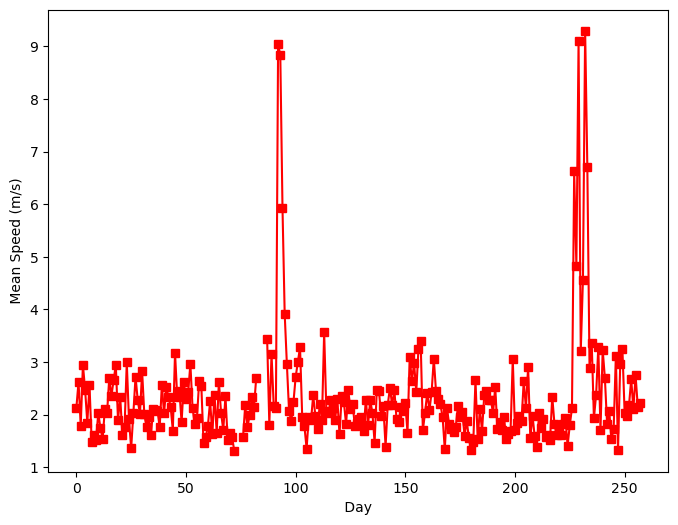

In [6]:
plt.figure(figsize = (8,6))
plt.plot(daily_mean_speed, "rs-")
plt.xlabel(" Day ")
plt.ylabel(" Mean Speed (m/s) ");
plt.show()

In [ ]:
'''
enumerate() - is one of the built-in Python functions. It returns an enumerated object. In our case, that object is a list of tuples (immutable lists), each containing a pair of count/index and value.

'''